## 서울시 구별 CCTV 현황 분석하기

### 2024년 8월 9일 Pandas, Matplotlib 실습 

* 데이터 제공: PinkWink
* Anaconda 가상환경 "Walter(Python 3.10.13)" 적용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unable to acknowldege system. Maybe Linux?')

In [2]:
# 정해진 경로에서 csv 파일을 읽어온다.
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
# "기관명" column의 제목을 "구별"로 바꾼다. inplace=True는 변수의 내용을 즉시 갱신해 출력한다. 
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
# 정해진 경로에서 excel 파일을 읽어온다. 3번째 row를 header로 사용한다.
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [5]:
# 각 header에 이름을 붙인다. 
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 서울 내 CCTV 자료 출력하기 

In [6]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [7]:
# CCTV_Seoul의 '소계' column을 기준으로 오름차순(낮은 것부터) 정렬한다.
# ascending 옵션을 바꾸면 내림차순(높은 것부터) 정렬할 수 있다. 
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [8]:
# 2013년도 이전과 비교해 2014년~2016년까지의 CCTV 증가율을 계산한다.
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100

# CCTV 증가율을 내림차순으로 정렬하여 출력한다. 
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 서울시 인구 동향 출력하기 

In [9]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
# 인구 합계는 현재 필요로 하는 값이 아니다. 
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [11]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [12]:
# 직접 drop할 값을 정하지 않고 조건에 맞는 값을 drop할 수 있다. 
"""
temp = pop_Seoul[pop_Seoul['구별'].isnull()]
pop_Seoul = pop_Seoul.drop(temp)
pop_Seoul.tail()
"""

# 맨 끝의 row를 삭제한다. 초기 파일의 맨 끝에는 NaN 값이 있다. 
pop_Seoul = pop_Seoul.drop(pop_Seoul.index[-1])
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [13]:
# 구별 외국인 및 고령자 비율을 출력한다. 
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [14]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [15]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [16]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [17]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [18]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 인구 동향과 CCTV 개수 비교하여 분석하기

In [19]:
test_data = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
test_data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [20]:
# 혹여 있을 수 있는 데이터 간 불일치 여부를 확인한다. 
if(len(CCTV_Seoul['구별'].unique()) == len(pop_Seoul['구별'].unique())):
    print('데이터 일치')
else:
    print('데이터 불일치')

데이터 일치


In [21]:
"""
del test_data['2013년도 이전']
del test_data['2014년']
del test_data['2015년']
del test_data['2016년']
test_data.head()
"""

"\ndel test_data['2013년도 이전']\ndel test_data['2014년']\ndel test_data['2015년']\ndel test_data['2016년']\ntest_data.head()\n"

In [22]:
# 0부터 시작하는 번호 행을 "구별" 행으로 대체한다. 
test_data.set_index('구별', inplace=True)
test_data.head()

,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [23]:
test_data.sort_values(by='소계', ascending=False).head(5)

,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,1843,142,30,467,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,1406,157,336,398,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,1138,224,278,468,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,1368,218,112,398,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [24]:
test_data.sort_values(by='인구수', ascending=False).head(5)

,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
송파구,618,529,21,68,463,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
test_data.sort_values(by="최근증가율", ascending=False).head(5)

,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
종로구,1002,464,314,211,630,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
마포구,574,314,118,169,379,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110
노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


## Matplotlib 사용 그래프 그려보기

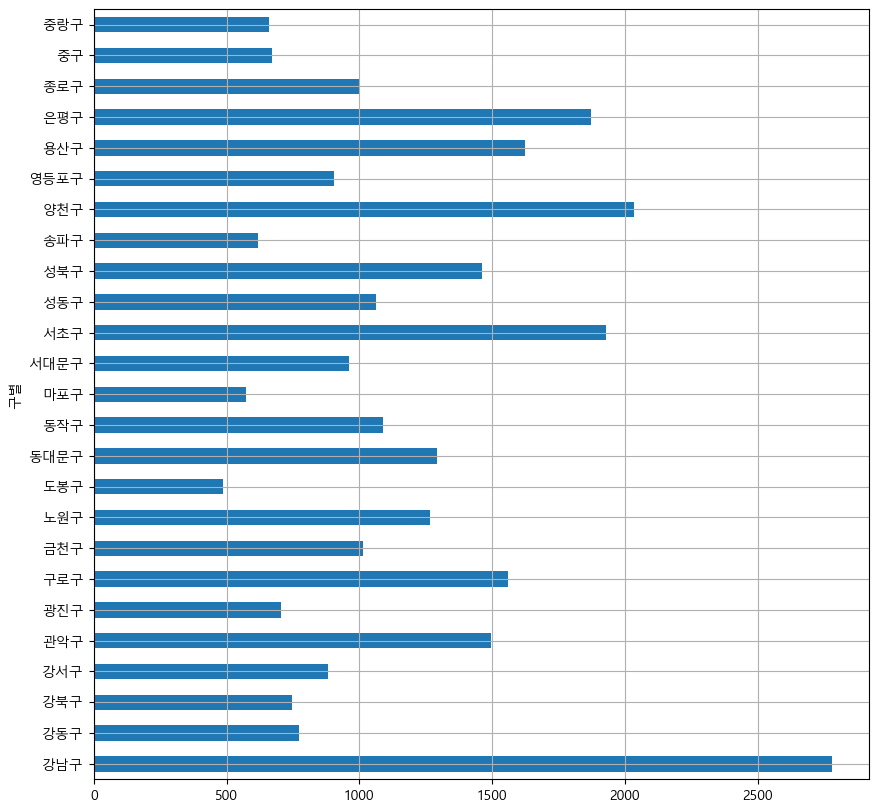

In [26]:
plt.figure()
test_data['소계'].plot(kind='barh', grid=True, figsize=(10,10))
## CCTV 수를 기준으로 bar 그래프를 수평으로 그린다.
## 그래프의 크기는 10x10으로 설정한다. 100DPI 기준, 10x10은 1000x1000 픽셀이다.
plt.show()

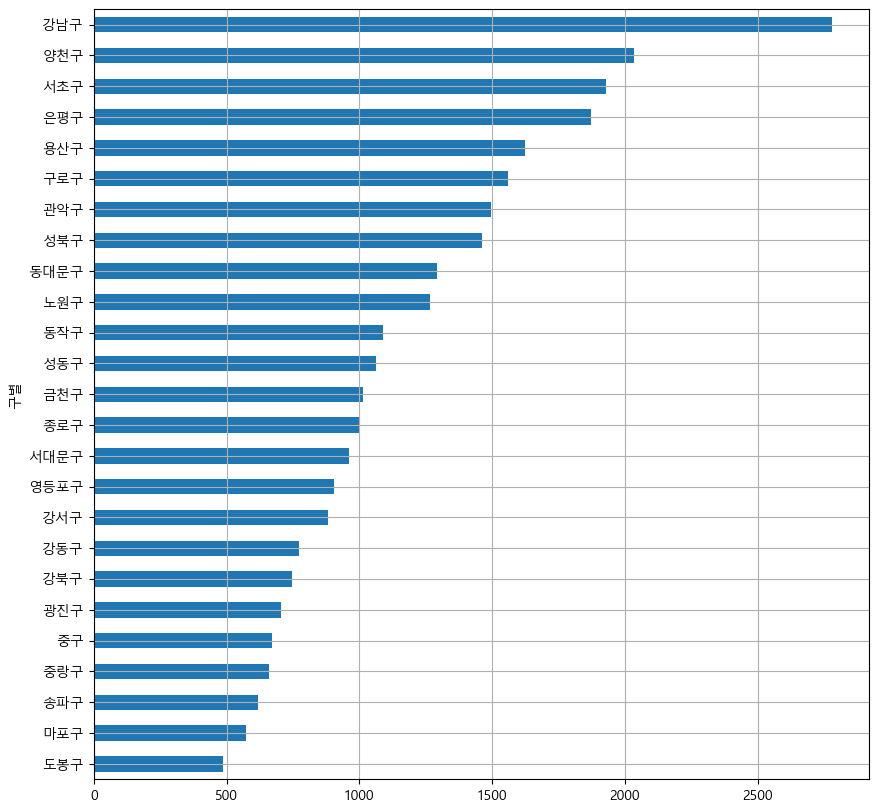

In [27]:
test_data['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

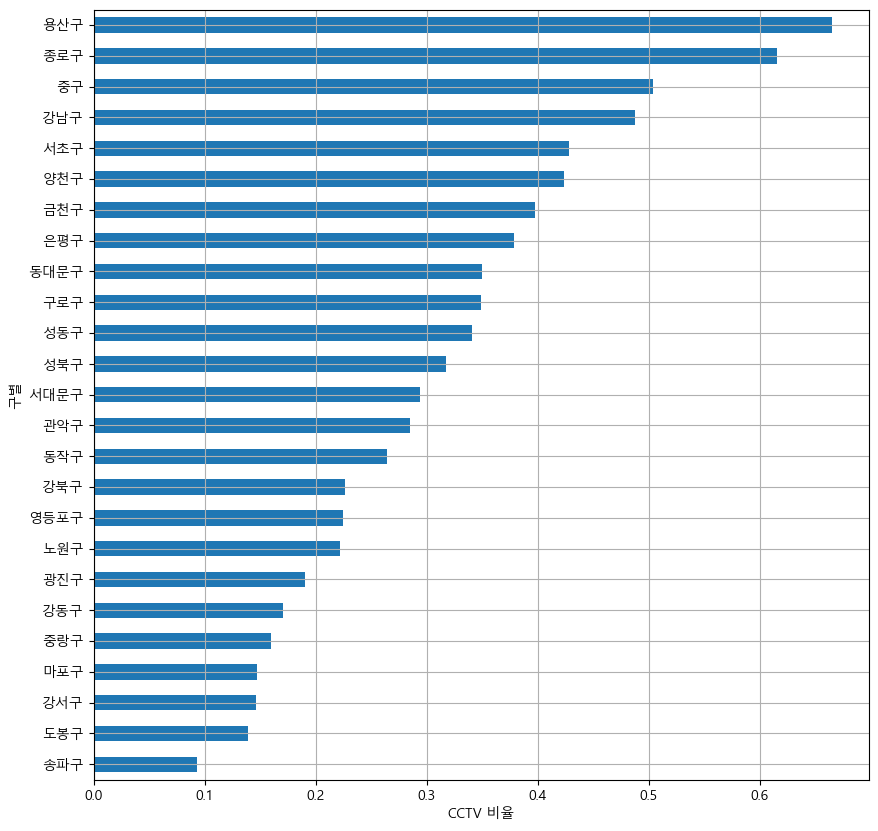

In [28]:
test_data['CCTV비율'] = test_data['소계'] / test_data['인구수'] * 100
test_data['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.xlabel('CCTV 비율')
plt.show()

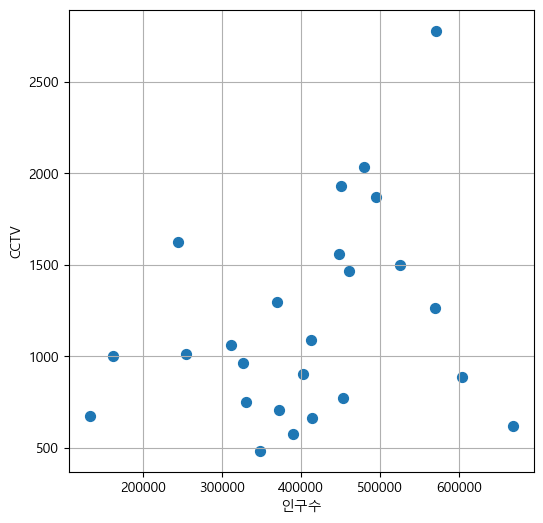

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(test_data['인구수'], test_data['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [30]:
fp1 = np.polyfit(test_data['인구수'], test_data['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [31]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

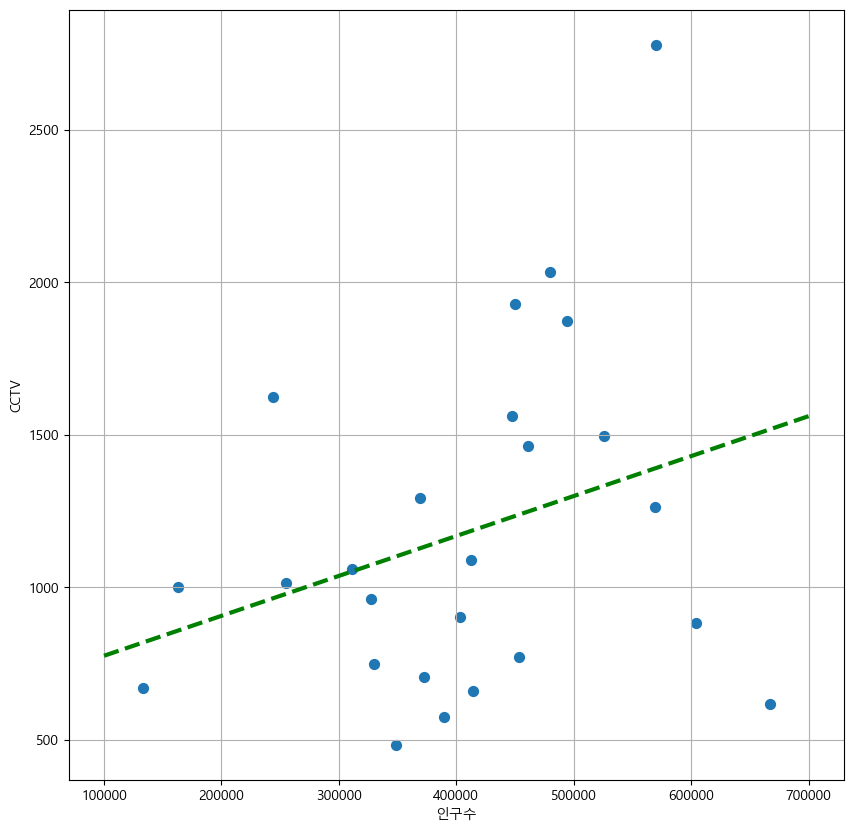

In [32]:
plt.figure(figsize=(10,10)) 
plt.scatter(test_data['인구수'], test_data['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [33]:
test_data['오차'] = np.abs(test_data['소계'] - f1(test_data['인구수']))
df_sort = test_data.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,,,,
강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,529,21,68,463,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,1843,142,30,467,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,1406,157,336,398,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,1368,218,112,398,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


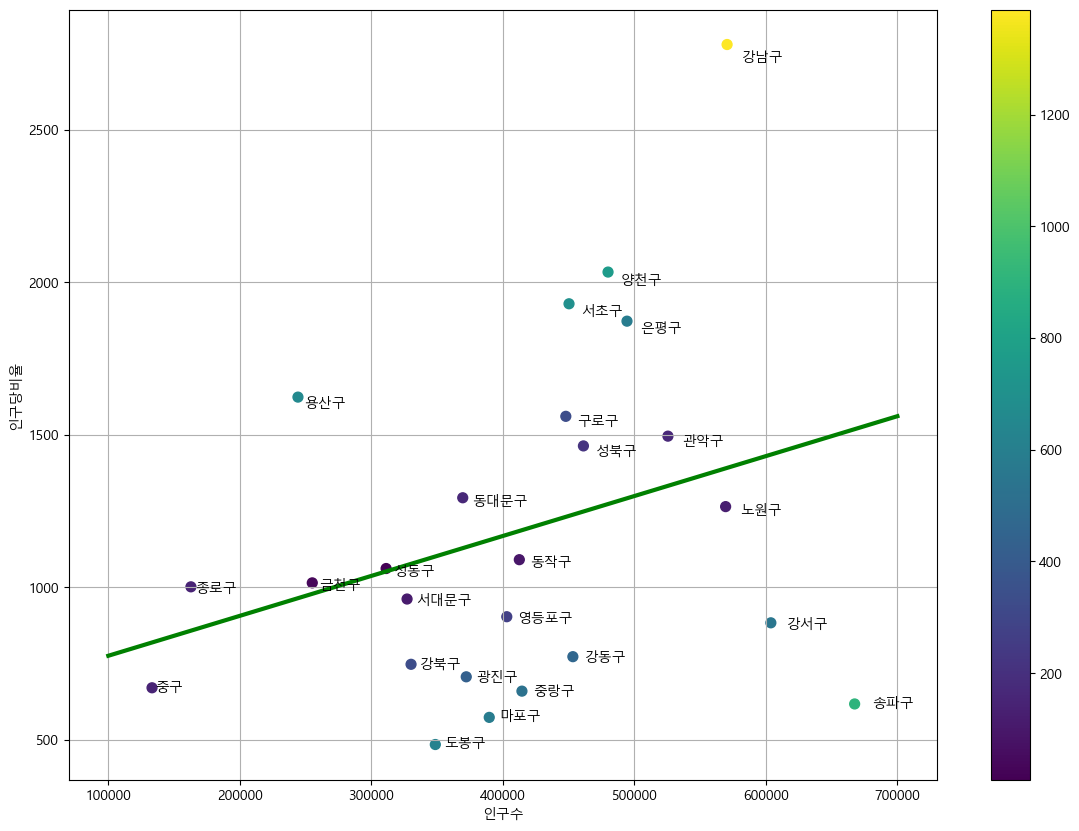

In [38]:
plt.figure(figsize=(14,10))
plt.scatter(test_data['인구수'], test_data['소계'], 
            c=test_data['오차'], s=50)
plt.plot(fx, f1(fx), ls='solid', lw=3, color='g')

# for n in range():
    # plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             # df_sort.index[n], fontsize=13)

for n in range(25):
    plt.text(df_sort['인구수'].iloc[n]*1.02, df_sort['소계'].iloc[n]*0.98, 
             df_sort.index[n], fontsize=10)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다

## 왜?

### 차후의 과제 

* 서울시 예산 데이터를 습득하여 CCTV가 많은 구와 적은 구의 예산 배정 비율을 조사한다
* 외국인 비율이 높은 구와 낮은 구, 고령자 비율이 높은 구와 낮은 구에 대해서도 동일히 한다
* 왜 해당 구에 CCTV가 많을 필요가 있을지에 대해 부가적으로 조사한다 - 다음 예제와 연관되어 있음